# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Regularization and Cross-Validation
Week 3 | Lesson 2.4

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Explain the connection between the bias-variance tradeoff and the train-test split
- Perform a split of data into testing and training sets
- Make a prediction on the ISE value using a Linear Regression

![](assets/the_sweet_spot.png)

In [1]:
from os import chdir 
chdir('/Users/toddmoffett1/DSI/dsi_repo/DSI_SM_3/lib/')

In [5]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split

## Linear Regression

lr.coef_: [ 0.39390555]
lr.intercept_: -0.0318043430268
training set score: 0.67
test set score: 0.66


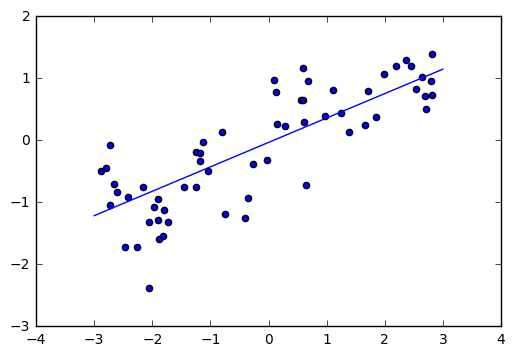

In [6]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
xfit = np.linspace(-3,3,100)
plt.scatter(X, y)
plt.plot(xfit, xfit*lr.coef_ + lr.intercept_)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

### Linear Regression on the Boston Data

In [7]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

training set score: 0.95
test set score: 0.61


## Ridge Regression

Mathematically, Ridge penalizes the L2 norm of the coefficients, or the Euclidean length of w.

From lecture 2.4:

> The length of the vector, $\mathbf v$ is defined as

> $$||\mathbf v||= \sqrt{\mathbf v \cdot \mathbf v}$$

The length of a vector **IS** the L2 norm.

$$ \texttt{norm}_2 = \sqrt{\mathbf v \cdot \mathbf v} = \sqrt{v_1^2+v_2^2+\dots+v_n^2}$$

In [8]:
vector_length = lambda x: np.sqrt(np.dot(x, x))
from numpy.linalg import norm

In [9]:
vector_length((3,4))

5.0

In [10]:
norm((3,4))

5.0

In [11]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

training set score: 0.89
test set score: 0.75


In [12]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

training set score: 0.79
test set score: 0.64


In [13]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

training set score: 0.93
test set score: 0.77


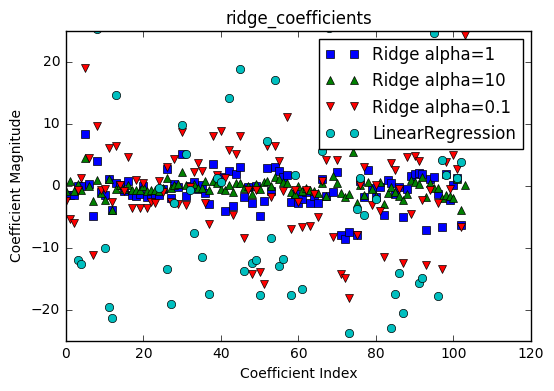

In [14]:
plt.title("ridge_coefficients")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.ylim(-25, 25)
plt.legend()

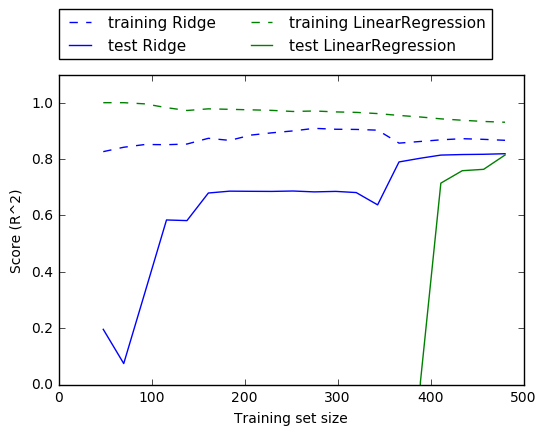

In [16]:
mglearn.plots.plot_ridge_n_samples()

- Without enough data standard regression is useless
- As more data becomes available, both models improve and standard regression eventually catches up to ridge regression
- Ridge regression has a decreased *training* performance -- it is harder for the model to "memorize the data"

## The Lasso

Mathematically, the Lasso penalizes the L1 norm of the coefficients, or sum of the absolute values of the coefficients.

$$ \texttt{norm}_1 = \rvert v_1 \rvert+ \rvert v_2 \rvert+\dots+ \rvert v_n \rvert = \sum \rvert v_i \rvert$$

Because of this many coefficients are exactly zero. This is equivalent to saying that these features are not used. 

In [17]:
from sklearn.linear_model import Lasso

In [18]:
lasso = Lasso().fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

training set score: 0.29
test set score: 0.21
Number of features used: 4


In [19]:
lasso01 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso01.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso01.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso01.coef_ != 0)))

training set score: 0.90
test set score: 0.77
Number of features used: 33


In [20]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso0001.coef_ != 0)))

training set score: 0.95
test set score: 0.64
Number of features used: 94


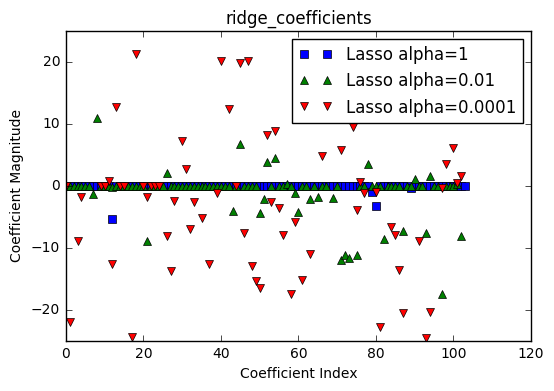

In [21]:
plt.title("ridge_coefficients")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso01.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.0001")

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.ylim(-25, 25)
plt.legend()

---

# Cross-Validation

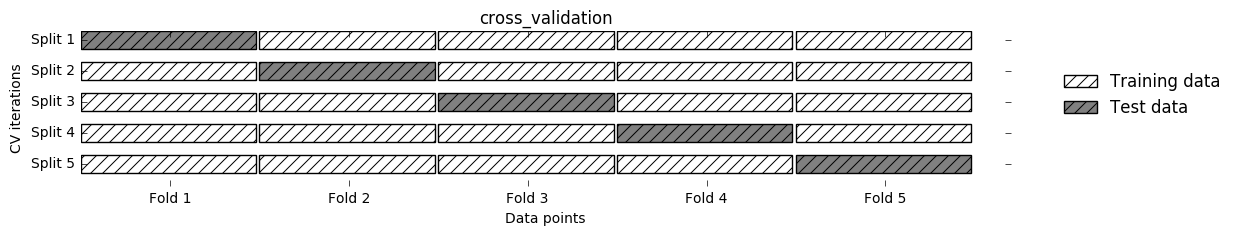

In [22]:
mglearn.plots.plot_cross_validation()

In $\mathbf K$-**Fold Cross-Validation** rather than splitting the data into a training set and a test set, the data is split $K$ times and $K$ models are developed.

We measure then accuracy of each model.

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
from sklearn.metrics import make_scorer, mean_squared_error
MSE = make_scorer(mean_squared_error)

In [25]:
X, y = mglearn.datasets.load_extended_boston()

In [26]:
cross_val_scores = cross_val_score(Lasso(), X, y, scoring=MSE)
cross_val_scores

array([  48.47879498,  138.11478786,  115.39576661])

Mean MSE for alpha= 1e-05 is 772195.32
Mean MSE for alpha=0.0001 is 529763.69
Mean MSE for alpha= 0.001 is 89642.77
Mean MSE for alpha=  0.01 is 3213.63
Mean MSE for alpha=   0.1 is 4095.72
Mean MSE for alpha=     1 is 240.00
Mean MSE for alpha=    10 is 169.93
Mean MSE for alpha=   100 is 89.20
Mean MSE for alpha=  1000 is 102.61


(-5, 1000)

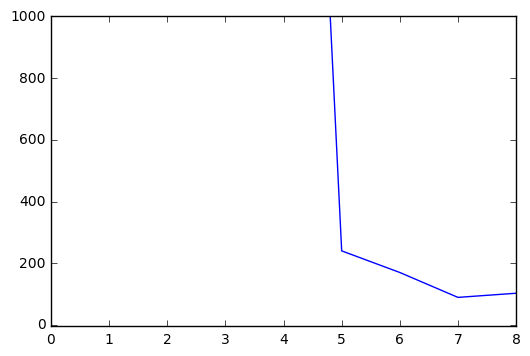

In [36]:
alphas = [1E-5, 1E-4, 1E-3, 0.01, 0.1, 1, 10, 100, 1000]

for alp in alphas:
    RIDGE_REGRESSOR = Ridge(alpha=alp, max_iter=1E5, normalize=True)
    cross_val_scores = cross_val_score(RIDGE_REGRESSOR, X, y, scoring=MSE)
    mean_mse = np.mean(cross_val_scores)
    print("Mean MSE for alpha={:6} is {:.2f}".format(alp, mean_mse))
                                             
mn_mn_sq_ers = [np.mean(cross_val_score(Ridge(alpha=alp, max_iter=1E5, normalize=True), X, y, scoring=MSE)) for alp in alphas]
plt.plot(mn_mn_sq_ers)
plt.ylim(-5, 1000)

In [ ]:
alphas = [1E-5, 1E-4, 1E-3, 0.01, 0.1, 1, 10, 100, 1000]

for alp in alphas:
    LASSO_REGRESSOR = Lasso(alpha=alp, max_iter=1E5, normalize=True)
    cross_val_scores = cross_val_score(LASSO_REGRESSOR, X, y, scoring=MSE)
    mean_mse = np.mean(cross_val_scores)
    print("Mean MSE for alpha={:6} is {:.2f}".format(alp, mean_mse))
                                             
mn_mn_sq_ers = [np.mean(cross_val_score(Lasso(alpha=alp), X, y, scoring=MSE)) for alp in alphas]
plt.plot(mn_mn_sq_ers)

## The ElasticNet 

The best of both worlds.

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function, for an $\alpha$ as a learning rate and $\gamma$ as an `l1 ratio`:


$$\frac{1}{2n}\cdot\texttt{norm}_2(y - Xw)+\alpha\gamma\cdot\texttt{norm}_1(w)+\alpha(1-\gamma)\cdot\texttt{norm}_2(w)$$



In [37]:
from sklearn.linear_model import ElasticNet

In [38]:
elastic_net = ElasticNet().fit(X_train, y_train)
print("training set score: {:.2f}".format(elastic_net.score(X_train, y_train)))
print("test set score: {:.2f}".format(elastic_net.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(elastic_net.coef_ != 0)))

training set score: 0.33
test set score: 0.22
Number of features used: 38


In [39]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.2).fit(X_train, y_train)
print("training set score: {:.2f}".format(elastic_net.score(X_train, y_train)))
print("test set score: {:.2f}".format(elastic_net.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(elastic_net.coef_ != 0)))

training set score: 0.71
test set score: 0.53
Number of features used: 77


### NOW WE HAVE TWO PARAMETERS TO TUNE!!!

## Grid Search

An exhaustive search over specified parameter values for an estimator.

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
elastic_net = ElasticNet()
parameters = { 'alpha' : [1E-4, 1E-3, 1E-2, 0.1, 1, 10, 100, 1000], 'l1_ratio' : np.linspace(0,1,11)}
REGRESSOR = GridSearchCV(elastic_net, parameters, scoring=MSE)
REGRESSOR.fit(X, y)

/Users/toddmoffett1/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


GridSearchCV(cv=None, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'l1_ratio': array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error), verbose=0)

In [42]:
import pandas as pd
import seaborn as sns

In [43]:
grid_search_results = pd.DataFrame(REGRESSOR.cv_results_)

In [44]:
grid_search_results.head(1)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_l1_ratio,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.022094,0.000323,116.895337,6.274532,0.0001,0,"{u'alpha': 0.0001, u'l1_ratio': 0.0}",12,28.97403,7.371388,20.082764,7.499936,302.728823,3.952273,0.002248,0.000043,131.065145,1.642924


In [45]:
grid_search_results['alpha'] = grid_search_results['params'].apply(lambda x: x['alpha'])
grid_search_results['l1_ratio'] = grid_search_results['params'].apply(lambda x: x['l1_ratio'])

In [46]:
grid_search_results.head(1)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_l1_ratio,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score,alpha,l1_ratio
0,0.022094,0.000323,116.895337,6.274532,0.0001,0,"{u'alpha': 0.0001, u'l1_ratio': 0.0}",12,28.97403,7.371388,20.082764,7.499936,302.728823,3.952273,0.002248,0.000043,131.065145,1.642924,0.0001,0.0


In [47]:
grid_search_results_of_interest = grid_search_results[['mean_test_score', 'mean_train_score', 'alpha', 'l1_ratio']]

In [48]:
grid_search_results_of_interest.head()

,mean_test_score,mean_train_score,alpha,l1_ratio
0,116.895337,6.274532,0.0001,0.0
1,124.951870,6.215525,0.0001,0.1
2,134.391864,6.152931,0.0001,0.2
3,146.500311,6.085898,0.0001,0.3
4,160.617497,6.012978,0.0001,0.4


In [49]:
def get_mean_test_score(x,y):
    index = grid_search_results[(grid_search_results['alpha']==x) & (grid_search_results['l1_ratio'] == y)].index[0]
    return grid_search_results.get_value(index, 'mean_test_score')

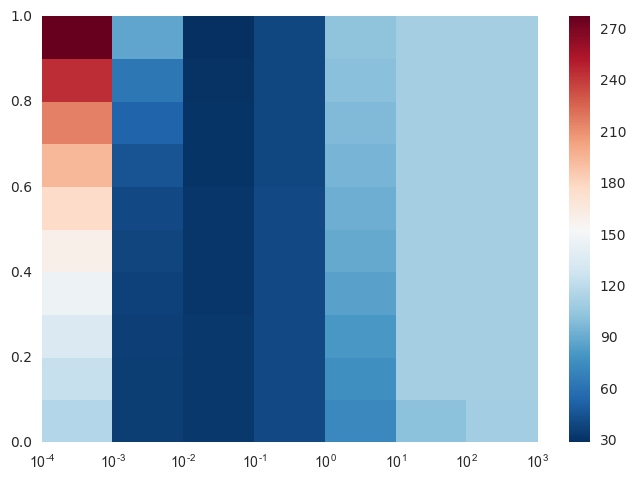

In [50]:
xs = grid_search_results['alpha'].unique()
ys = grid_search_results['l1_ratio'].unique()

intensity = [[get_mean_test_score(x, y) for x in xs] for y in ys]

plt.xscale('log')
plt.pcolormesh(xs, ys, intensity, cmap='RdBu_r')
plt.colorbar() #need a colorbar to show the intensity scale